In [242]:
import nltk
nltk.download()
from nltk.corpus import wordnet
from nltk.corpus import wordnet
import collections
import requests
from bs4 import BeautifulSoup
#from requests_html import HTMLSession
from PyDictionary import PyDictionary

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words("english")
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [713]:
from contextlib import suppress

In [244]:
import pandas as pd
from itertools import chain
import numpy as np
import re
import string
from collections import Counter
from os import path
from PIL import Image
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Scraped data from a webpage

In [245]:
def Scraped_data(subject):
    str1='https://paperswithcode.com/search?q_meta=&q_type=&q='
    str2=subject
    url=str1+str2
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    papers = soup.find_all('div', class_="col-lg-9 item-content")
    Titles=[]
    Dates=[]
    Abstracts=[]
    for paper in papers:
        # Each job_elem is a new BeautifulSoup object.
        # You can use the same methods on it as you did before.
        Title = paper.find('a').text.strip()
        Titles.append(Title)
        Date = paper.find('span',class_="author-name-text")
        if Date:
            Date=Date.text.strip()
            Dates.append(Date)
        else:
            Dates.append(np.nan)
        Abstract = paper.find('p',class_="item-strip-abstract").text.strip()
        if Abstract:
            Abstract = paper.find('p',class_="item-strip-abstract").text.strip()
            Abstracts.append(Abstract)
        else:
            Abstracts.append(np.nan)
    d = {'Titles':Titles, 'Dates': Dates,'Abstracts':Abstracts}
    df = pd.DataFrame(data=d)
    return df



In [246]:
subjects=['medical','art','computer+vision','graph','speech','time+series','audio','robots','reasoning','adversarial']

In [247]:
medical=Scraped_data(subjects[3])
medical

,Titles,Dates,Abstracts
0,DDGK: Learning Graph Representations for Deep ...,21 Apr 2019,"Second, for each pair of graphs, we train a cr..."
1,Fast Linear Model for Knowledge Graph Embeddings,30 Oct 2017,This paper shows that a simple baseline based ...
2,Scalable Deep Generative Modeling for Sparse G...,NaN,"Based on this, we develop a novel autoregressi..."
3,Diffusion Improves Graph Learning,NaN,"In this work, we remove the restriction of usi..."
4,Learning Graph Structure With A Finite-State A...,NaN,"In practice, edges are used both to represent ..."
5,"Deep Graph Library: A Graph-Centric, Highly-Pe...",3 Sep 2019,Advancing research in the emerging field of de...
6,Principal Neighbourhood Aggregation for Graph ...,NaN,Graph Neural Networks (GNNs) have been shown t...
7,Learning to Execute Programs with Instruction ...,NaN,"More practically, we evaluate these models on ..."
8,Fast Graph Representation Learning with PyTorc...,6 Mar 2019,"We introduce PyTorch Geometric, a library for ..."
9,Cluster-GCN: An Efficient Algorithm for Traini...,NaN,"Furthermore, Cluster-GCN allows us to train mu..."


# Data cleaning, remove synonyms

In [590]:
#replace words
def text_to_words(text,sw):
    translator = re.compile('[%s]' % re.escape(string.punctuation))
    text =translator.sub(' ', text)
    text = text.lower()
    words = word_tokenize(text)
    #words = text.split()
    
    vocab=[]
    for word in words:
        if word.isalpha() and not word in sw:
            vocab.append(word)
    return vocab

In [691]:
sw.append('end')
sw.append('lot')
sw.append('without')
sw.append('due')
sw.append('uses')
sw.append('another')
sw.append('show')
sw.append('used')
sw.append('either')
sw.append('different')
sw.append('often')
sw.append('contain')
sw.append('mix')
sw.append('including')
sw.append('e')
sw.append('g')

In [692]:
# get the word list for multiple papers from different fields
sub=[]
wordcloud=list()
for s in subjects:
    As=Scraped_data(s).Abstracts
    sub.append(s)
    SubWords=list()
    for A in As:
        
        #if A:
        word=text_to_words(A,sw)
        SubWords.append(word)
        #else:
            #SubWords.append('')
        #SubWords = list(chain.from_iterable(SubWords))
    wordcloud.append(SubWords)

In [693]:
df=np.transpose(pd.DataFrame(wordcloud,sub))
df

,medical,art,computer+vision,graph,speech,time+series,audio,robots,reasoning,adversarial
0,"[generative, adversarial, networks, gained, at...","[transformer, architectures, facilitated, buil...","[convolutional, networks, core, state, art, co...","[second, pair, graphs, train, cross, graph, at...","[deep, learning, approach, recognize, english,...","[multi, horizon, forecasting, problems, comple...","[small, number, weights, sparse, wavernn, make...","[focus, project, autonomous, navigation, goal,...","[commonsense, reasoning, long, standing, chall...","[paper, develop, improved, techniques, defendi..."
1,"[niftynet, provides, modular, deep, learning, ...","[present, release, new, tool, music, source, s...","[humans, read, write, hundreds, billions, mess...","[paper, shows, simple, baseline, based, bag, w...","[first, time, learning, powerful, representati...","[observe, method, consistently, outperforms, b...","[efficient, audio, synthesis, inherently, diff...","[present, framework, data, driven, robotics, m...","[natural, language, questions, inherently, com...","[adversarial, examples, malicious, inputs, des..."
2,"[contrast, approach, building, recent, learnin...","[present, flair, nlp, framework, designed, fac...","[work, presents, kornia, open, source, compute...","[based, develop, novel, autoregressive, model,...","[present, state, art, speech, recognition, sys...","[problem, especially, hard, solve, time, serie...","[introduce, cola, self, supervised, pre, train...","[develop, software, stack, allows, smartphones...","[demonstrate, framework, pose, estimation, pro...","[form, adversarial, training, converges, degen..."
3,"[implementation, kinds, unet, models, image, s...","[text, discusses, several, popular, explanator...","[work, presents, kornia, open, source, compute...","[work, remove, restriction, using, direct, nei...","[text, speech, synthesis, system, typically, c...","[future, stock, prices, predicted, nonlinear, ...","[paper, introduces, wavenet, deep, neural, net...","[paper, introduces, pyrobot, open, source, rob...","[analogical, reasoning, effective, capturing, ...","[ask, whether, neural, networks, learn, use, s..."
4,"[define, registration, parametric, function, o...","[since, bert, neglects, dependency, among, pre...","[present, gluoncv, gluonnlp, deep, learning, t...","[practice, edges, represent, intrinsic, struct...","[clone, voice, seconds, generate, arbitrary, s...","[present, sktime, new, scikit, learn, compatib...","[recent, advances, birdsong, detection, classi...","[behavior, tree, bt, way, structure, switching...","[scene, text, image, contains, two, levels, co...","[adversarial, training, provides, means, regul..."
5,"[performance, deep, learning, significantly, a...","[first, time, learning, powerful, representati...","[despite, significant, progress, deep, learnin...","[advancing, research, emerging, field, deep, g...","[speech, synthesis, important, practical, gene...","[combination, advanced, training, techniques, ...","[within, music, information, retrieval, mir, p...","[reinforcement, learning, rl, enables, robots,...","[paper, develop, neural, assistant, single, ne...","[investigate, conditional, adversarial, networ..."
6,"[present, dltk, toolkit, providing, baseline, ...","[language, models, become, key, step, achieve,...","[computer, graphics, generate, synthetic, imag...","[graph, neural, networks, gnns, shown, effecti...","[librispeech, achieve, wer, test, use, languag...","[defending, machine, learning, models, involve...","[audio, processing, models, based, deep, neura...","[mainstream, computer, vision, machine, learni...","[probability, trees, one, simplest, models, ca...","[collecting, well, annotated, image, datasets,..."
7,"[infeasible, train, cnn, models, directly, hig...","[lxmert, build, large, scale, transformer, mod...","[since, output, event, cameras, fundamentally,...","[practically, evaluate, models, task, learning...","[experiments, wsj, reduce, wer, strong, charac

In [694]:
sums=[]
for s in range(len(subjects)):
    a=list([j for i in df.iloc[s] for j in i])
    sums.append(a)
    #sum.append([a,subjects[s]])

In [695]:
sums=pd.Series(sums,index=subjects)
sums

medical            [generative, adversarial, networks, gained, at...
art                [niftynet, provides, modular, deep, learning, ...
computer+vision    [contrast, approach, building, recent, learnin...
graph              [implementation, kinds, unet, models, image, s...
speech             [define, registration, parametric, function, o...
time+series        [performance, deep, learning, significantly, a...
audio              [present, dltk, toolkit, providing, baseline, ...
robots             [infeasible, train, cnn, models, directly, hig...
reasoning          [paper, propose, recurrent, convolutional, neu...
adversarial        [proposed, architecture, recaptures, discarded...
dtype: object

### Frequency of word for a specific dataset

In [696]:
def find_bigrams(words):
  
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    
    freq_threshold = 2
    bigrams = []

    bigram_finder = BigramCollocationFinder.from_words(words)
    bigram_finder.apply_freq_filter(freq_threshold)
    bigrams.append([x[0] for x in bigram_finder.score_ngrams(bigram_measures.pmi)])


   # newWordslength=len(words)-len(bigrams[0])
    newWords=[]
    for w in range(len(words)-1):
        for i in range(len(ngrams[0])):
            if words[w]==ngrams[0][i][0] and words[w+1]==ngrams[0][i][1]:
                newword=[]
                ww=[words[w],words[w+1]]
                newword= "_".join(ww)
                newWords.append(newword)
            elif w> 1 and words[w-1]==ngrams[0][i][0] and words[w]==ngrams[0][i][1]:
                print(ww)
            else:
                newWords.append(words[w])
    return bigrams,newWords

In [760]:
def Combine_synonyms(Sdf):
    dict = {}
    Sets = set()
    rep1=[]
    rep2=[]
    for wordToCehck in Sdf.word:
        if wordToCehck not in Sets:
            synonyms=[]
            for syn in wordnet.synsets(wordToCehck):
                for l in syn.lemmas():
                    synonyms.append(l.name())
            ss=set(synonyms)            
            Sets.update(ss)
            for syns in ss:
                dict[syns]=wordToCehck
                            
        else:
            rootWord=dict.get(wordToCehck)
            synf=float(Sdf.freq[Sdf.word==wordToCehck])
            root=float(Sdf.freq[Sdf.word==rootWord])
            Sdf.freq[Sdf.word==rootWord]= (root + synf) #delete the word with lower frequency
            rep1.append(wordToCehck)
            rep2.append(rootWord)
            # 
    for r in rep1:
        Sdf=Sdf[Sdf.word!=r]
        
    return Sdf,rep1,rep2;

SymbigramCorrectlist,rep1,rep2=Combine_synonyms(Sdf)
print(rep1,rep2)# check for synaonyms
SymbigramCorrectlist

['use', 'propose', 'learn', 'mapping', 'set', 'context', 'run', 'task', 'form', 'result', 'speech', 'order', 'assess', 'train', 'art', 'deep'] ['using', 'proposed', 'learning', 'map', 'sets', 'setting', 'test', 'tasks', 'class', 'results', 'language', 'ranking', 'evaluate', 'aimed', 'graphics', 'deeper']


,word,freq
0,image,20.0
2,training,16.0
1,using,NaN
3,gcn,12.0
4,proposed,NaN
...,...,...
176,wide,3.0
177,variety,3.0
178,computer_vision,1.0
179,deep_learning,1.0


In [698]:
def Combine_same_root_words(Sdf):
    dict = {}
    for wordToCehck in Sdf.word:
        if len(word)>=5:
            root=wordToCehck[0:4]
            
            if root not in dict.keys():
                
                dict[root] = wordToCehck
            else:
                rootWord=dict[root]
                Sdf.freq[Sdf.word==rootWord]=int(Sdf.freq[Sdf.word==rootWord])+ int(Sdf.freq[Sdf.word==wordToCehck])
                Sdf=Sdf[Sdf.word!=wordToCehck] #delete the word with lower frequency
            
    
    return Sdf;



In [699]:
subject='speech'

In [700]:
sums[subject]

['define',
 'registration',
 'parametric',
 'function',
 'optimize',
 'parameters',
 'given',
 'set',
 'images',
 'collection',
 'interest',
 'since',
 'bert',
 'neglects',
 'dependency',
 'among',
 'predicted',
 'tokens',
 'xlnet',
 'introduces',
 'permuted',
 'language',
 'modeling',
 'plm',
 'pre',
 'training',
 'address',
 'problem',
 'present',
 'gluoncv',
 'gluonnlp',
 'deep',
 'learning',
 'toolkits',
 'computer',
 'vision',
 'natural',
 'language',
 'processing',
 'based',
 'apache',
 'mxnet',
 'incubating',
 'practice',
 'edges',
 'represent',
 'intrinsic',
 'structure',
 'abstract',
 'syntax',
 'trees',
 'programs',
 'abstract',
 'relations',
 'aid',
 'reasoning',
 'downstream',
 'task',
 'results',
 'relevant',
 'program',
 'analyses',
 'clone',
 'voice',
 'seconds',
 'generate',
 'arbitrary',
 'speech',
 'real',
 'time',
 'present',
 'sktime',
 'new',
 'scikit',
 'learn',
 'compatible',
 'python',
 'library',
 'unified',
 'interface',
 'machine',
 'learning',
 'time',
 'ser

In [701]:
bigrams,bigramCorrectlist=find_bigrams(sums[subject])

['deep', 'learning']
['computer', 'vision']


In [702]:
# Create counters
counts = collections.Counter(bigramCorrectlist) #medical
counts.most_common(20)

[('learning', 15),
 ('training', 12),
 ('supervised', 12),
 ('language', 8),
 ('present', 8),
 ('structure', 8),
 ('abstract', 8),
 ('time', 8),
 ('virtual', 8),
 ('adversarial', 8),
 ('algorithms', 8),
 ('computer', 7),
 ('define', 4),
 ('registration', 4),
 ('parametric', 4),
 ('function', 4),
 ('optimize', 4),
 ('parameters', 4),
 ('given', 4),
 ('set', 4)]

In [703]:
#View the counts
Sdf = pd.DataFrame(list(counts.most_common()),columns = ['word','freq'])
Sdf.freq.astype(int)
Sdf=Sdf.sort_values(by='freq',ascending=False)
Sdf

,word,freq
0,learning,15
2,supervised,12
1,training,12
7,time,8
10,algorithms,8
...,...,...
40,toolkits,4
120,deep,3
121,vision,3
122,deep_learning,1


In [733]:
SymbigramCorrectlist,rep1,rep2=Combine_synonyms(Sdf)
print(rep1,rep2)# check for synaonyms


['model', 'framework', 'go', 'solve', 'set'] ['models', 'models', 'work', 'work', 'localized']


In [734]:
counts = collections.Counter(bigramCorrectlist) 

RootSymbigramCorrectlist=Combine_same_root_words(SymbigramCorrectlist)


C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [735]:
print(RootSymbigramCorrectlist)
RootSymbigramCorrectlist.describe

          word  freq
0         unet  24.0
2       neural  12.0
1         text  12.0
9        graph   8.0
14  introduces  12.0
..         ...   ...
40        upon   4.0
49      remove   4.0
48    problems   4.0
45        aims   4.0
43    routines   4.0

[97 rows x 2 columns]


<bound method NDFrame.describe of           word  freq
0         unet  24.0
2       neural  12.0
1         text  12.0
9        graph   8.0
14  introduces  12.0
..         ...   ...
40        upon   4.0
49      remove   4.0
48    problems   4.0
45        aims   4.0
43    routines   4.0

[97 rows x 2 columns]>

In [746]:
for i in subjects:
    with suppress('20'):
        vocabs=list()
        subject=i
        
        bigrams,bigramCorrectlist=find_bigrams(sums[subject]) #find bigrams
        
        counts = collections.Counter(bigramCorrectlist) # Create counters

        Sdf = pd.DataFrame(list(counts.most_common()),columns = ['word','freq']) #change to dataframe
        Sdf.freq.astype(int)
        Sdf=Sdf.sort_values(by='freq',ascending=False)
        
        SymbigramCorrectlist,rep1,rep2=Combine_synonyms(Sdf) #get rid of synonyms
        print(rep1,rep2)# check for synaonyms
        
        counts = collections.Counter(SymbigramCorrectlist) 
        #RootSymbigramCorrectlist=Combine_same_root_words(SymbigramCorrectlist)
        vocabs.append(SymbigramCorrectlist)


['computer', 'vision']
['variety', 'tasks']
['variety', 'tasks']
['computer', 'vision']
['variety', 'tasks']
['variety', 'tasks']
['deep', 'learning']
['deep', 'learning']
['project', 'modelling', 'data', 'capability', 'speech', 'recognize', 'network', 'train'] ['tasks', 'models', 'information', 'capacity', 'languages', 'known', 'networks', 'develop']
['deep', 'learning']
['framework', 'language', 'read', 'range', 'outperform', 'good', 'words', 'simple'] ['models', 'speech', 'recorded', 'image', 'outperforms', 'best', 'speech', 'simpler']
['computer', 'vision']
['computer', 'vision']
['deep', 'learning']
['develop', 'set', 'present', 'purpose', 'data', 'near', 'object', 'objective', 'estimation', 'work', 'image', 'function', 'formulate', 'contrast', 'speech', 'model'] ['training', 'pose', 'demonstrate', 'use', 'information', 'approach', 'target', 'target', 'approximation', 'form', 'images', 'maps', 'developed', 'line', 'language', 'models']
['computer', 'vision']
['computer', 'vision']

C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['modeling', 'store', 'need', 'relationship', 'image', 'resolution', 'function', 'event', 'require', 'accommodate'] ['model', 'memory', 'requires', 'relationships', 'seen', 'resolutions', 'work', 'events', 'requires', 'fit']
['deep', 'learning']
['network', 'language', 'graphics', 'manipulation', 'modeling', 'channel', 'deep'] ['net', 'speech', 'art', 'use', 'models', 'transfer', 'rich']
['computer', 'vision']
['deep', 'learning']
['wide', 'variety']
['use', 'propose', 'learn', 'mapping', 'set', 'context', 'run', 'task', 'form', 'result', 'speech', 'order', 'assess', 'train', 'art', 'deep'] ['using', 'proposed', 'learning', 'map', 'sets', 'setting', 'test', 'tasks', 'class', 'results', 'language', 'ranking', 'evaluate', 'aimed', 'graphics', 'deeper']


In [747]:
len(vocabs)
vocabs

[                word  freq
 0              image  20.0
 2           training  16.0
 1              using   NaN
 3                gcn  12.0
 4           proposed   NaN
 ..               ...   ...
 176             wide   3.0
 177          variety   3.0
 178  computer_vision   1.0
 179    deep_learning   1.0
 180     wide_variety   1.0
 
 [165 rows x 2 columns]]

In [711]:
subject='medical'
bigrams,bigramCorrectlist=find_bigrams(sums[subject])
#print(bigramCorrectlist)
# Create counters
counts = collections.Counter(bigramCorrectlist) #medical
counts.most_common(20)
#View the counts
Sdf = pd.DataFrame(list(counts.most_common()),columns = ['word','freq'])
Sdf.freq.astype(int)
Sdf=Sdf.sort_values(by='freq',ascending=False)
SymbigramCorrectlist,rep1,rep2=Combine_synonyms(Sdf)
print(rep1,rep2)# check for synaonyms
counts = collections.Counter(bigramCorrectlist) #medical
RootSymbigramCorrectlist=Combine_same_root_words(SymbigramCorrectlist)
medical=RootSymbigramCorrectlist

['computer', 'vision']
['variety', 'tasks']
['variety', 'tasks']
['computer', 'vision']
['variety', 'tasks']
['variety', 'tasks']
['deep', 'learning']
['deep', 'learning']
['network'] ['networks']


C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Zi Ye\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [496]:
# medical : 0
# time series: 5

type(sum[1])
medical=sums.medical
graph=sums.graph
speech=sums.robots
Mset=set(medical)
Gset=set(graph)
Sset=set(speech)

print('Medical, Graph and Speech studies all looks in to {} .'.format(Mset.intersection(Gset, Sset)))

Medical, Graph and Speech studies all looks in to {'deep', 'different', 'learning', 'networks', 'models', 'reasoning', 'vision', 'audio', 'computer', 'robotics'} .


In [493]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

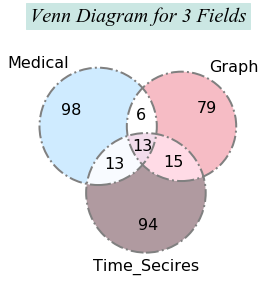

In [494]:
vd3=venn3([set(medical),set(graph),set(time_seres)],set_labels=('Medical', 'Graph','Time_Secires'),
          set_colors=('#c4e6ff', '#F4ACB7','#9D8189'), alpha = 0.8)
venn3_circles([set(medical), set(graph),set(time_seres)], linestyle='-.', linewidth=2, color='grey')
for text in vd3.set_labels:
    text.set_fontsize(16);
for text in vd3.subset_labels:
    text.set_fontsize(16)
plt.title('Venn Diagram for 3 Fields',fontname='Times New Roman',fontweight='bold',fontsize=20,
 pad=30,backgroundcolor='#cbe7e3',color='black',style='italic');
plt.show()

[('graph', 3),
 ('time', 3),
 ('adversarial', 2),
 ('networks', 2),
 ('attention', 2),
 ('computer', 2),
 ('vision', 2),
 ('without', 2),
 ('capacity', 2),
 ('possible', 2),
 ('wide', 2),
 ('variety', 2),
 ('tasks', 2),
 ('end', 2),
 ('deep', 2),
 ('learning', 2),
 ('inputs', 2),
 ('generative', 1),
 ('gained', 1),
 ('lot', 1)]

In [206]:
fdf = pd.DataFrame(counts.most_common(20),
                             columns=['words', 'count'])

fdf.head()

,words,count
0,graph,3
1,time,3
2,adversarial,2
3,networks,2
4,attention,2


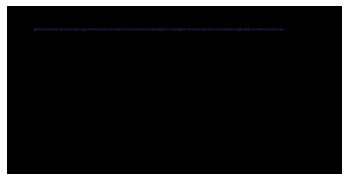

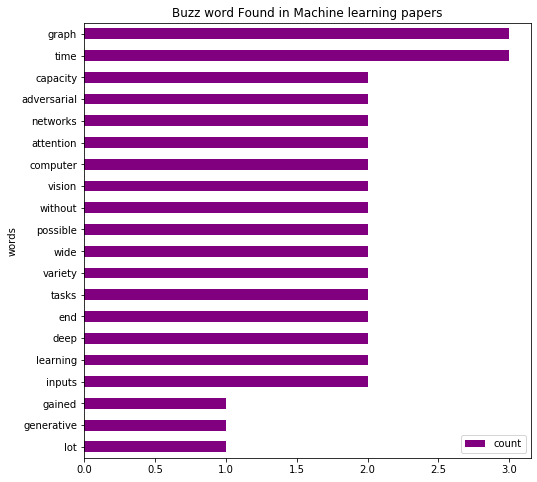

In [230]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
fdf.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Buzz word Found in Machine learning papers")

plt.show()

In [229]:
# Start with one review:
text = ''.join(df.medical[0])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

In [209]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [214]:
comment_words = ''
comment_words += " ".join(medical)+" "  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

TypeError: 'WordListCorpusReader' object is not iterable

In [199]:
get_synonyms(str(sum[1][2]))

TypeError: 'module' object is not callable

In [190]:
def generate_word_frequencies(words):
   # list to hold word frequencies
    word_frequencies = []

   # loop through the tokens and generate a word count for each token
    for word in words:
        word_frequencies.append(words.count(word))

   # aggregates the words and word_frequencies into tuples and coverts them into a dictionary
        word_frequencies = (dict(zip(words, word_frequencies)))

   # sort the frequency of the words from low to high
        sorted_frequencies = {key: value for key, value in 
        sorted(word_frequencies.items(), key=lambda item: item[1])}

    return sorted_frequencies

In [193]:
frequencies = generate_word_frequencies(sum[1])

AttributeError: 'dict' object has no attribute 'append'

In [316]:
def generate_word_frequencies(words):
   # list to hold word frequencies
   word_frequencies = []

   # loop through the tokens and generate a word count for each token
   for word in words:
      word_frequencies.append(words.count(word))

   # aggregates the words and word_frequencies into tuples and coverts them into a dictionary
   word_frequencies = (dict(zip(words, word_frequencies)))

   # sort the frequency of the words from low to high
   sorted_frequencies = {key: value for key, value in 
   sorted(word_frequencies.items(), key=lambda item: item[1])}

 return sorted_frequencies


def get_synonyms_internet(word):
   dictionary = PyDictionary(word)
   synonym = dictionary.getSynonyms()
   return synonym

all_synsets_1 = {}
for word in words:
  for synonym in wordnet.synsets(word):
    if word != synonym.name() and len(synonym.lemma_names()) > 1:
      for item in synonym.lemmas():
        if word != item.name():
          all_synsets_1.setdefault(word, []).append(str(item.name()).lower())

all_synsets_2 = {}
for word in words:
  word_synonyms = get_synonyms_internet(word)
  for synonym in word_synonyms:
    if word != synonym and synonym is not None:
      all_synsets_2.update(synonym)

 word_relationship = {**all_synsets_1, **all_synsets_2}

 frequencies = generate_word_frequencies(words)
 word_matches = []
 word_set = {}
 duplication_check = set()

 for word, frequency in frequencies.items():
    for keyword, synonym in word_relationship.items():
       match = [x for x in synonym if word == x]
       if word == keyword or match:
         match = ' '.join(map(str, match))
         if match not in word_set or match not in duplication_check or word not in duplication_check:
            duplication_check.add(word)
            duplication_check.add(match)
            word_matches.append([keyword, match, frequency])

 # used to hold the final keyword and frequencies
 final_results = {}

 # list comprehension to obtain the primary keyword and its frequencies
 synonym_matches = [(keyword[0], keyword[2]) for keyword in word_matches]

 # iterate synonym_matches and output total frequency count for a specific keyword
 for item in synonym_matches:
    if item[0] not in final_results.keys():
      frequency_count = 0
      frequency_count = frequency_count + item[1]
      final_results[item[0]] = frequency_count
 else:
    frequency_count = frequency_count + item[1]
    final_results[item[0]] = frequency_count

# do something with the final results

TypeError: expected string or bytes-like object